# Data Preprocessing

### Importing Python Library
### Reading Data
### Missing Data
### Deal with categorical data
### Splitting data
### Normlize data

# Import Python library, Reading Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv("C:\\Users\\HP\\Desktop\\Bup\\CSV_files\\Data .csv")

In [3]:
data

,City,Age,Sex,Smoke,HappinessIndex,Healthy
0,Mumbai,24.0,Male,Yes,241.0,Yes
1,London,80.0,Female,No,928.0,No
2,NewYork,38.0,Male,Yes,NaN,Yes
3,NewYork,22.0,Female,Yes,786.0,Yes
4,NewYork,36.0,Male,Yes,967.0,Yes
5,London,NaN,Female,Yes,665.0,Yes
6,Mumbai,17.0,Female,No,293.0,No
7,NewYork,28.0,Female,No,494.0,Yes
8,Mumbai,45.0,Female,No,707.0,No
9,London,29.0,Male,Yes,599.0,No


In [6]:
X= data.iloc[:,0:5].values
y=data.iloc[:,5].values

In [7]:
X

array([['Mumbai', 24.0, 'Male', 'Yes', 241.0],
       ['London', 80.0, 'Female', 'No', 928.0],
       ['NewYork', 38.0, 'Male', 'Yes', nan],
       ['NewYork', 22.0, 'Female', 'Yes', 786.0],
       ['NewYork', 36.0, 'Male', 'Yes', 967.0],
       ['London', nan, 'Female', 'Yes', 665.0],
       ['Mumbai', 17.0, 'Female', 'No', 293.0],
       ['NewYork', 28.0, 'Female', 'No', 494.0],
       ['Mumbai', 45.0, 'Female', 'No', 707.0],
       ['London', 29.0, 'Male', 'Yes', 599.0]], dtype=object)

In [8]:
y

array(['Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No'],
      dtype=object)

# Handling Missing Data

In [9]:
X

array([['Mumbai', 24.0, 'Male', 'Yes', 241.0],
       ['London', 80.0, 'Female', 'No', 928.0],
       ['NewYork', 38.0, 'Male', 'Yes', nan],
       ['NewYork', 22.0, 'Female', 'Yes', 786.0],
       ['NewYork', 36.0, 'Male', 'Yes', 967.0],
       ['London', nan, 'Female', 'Yes', 665.0],
       ['Mumbai', 17.0, 'Female', 'No', 293.0],
       ['NewYork', 28.0, 'Female', 'No', 494.0],
       ['Mumbai', 45.0, 'Female', 'No', 707.0],
       ['London', 29.0, 'Male', 'Yes', 599.0]], dtype=object)

In [10]:
from sklearn.preprocessing import Imputer
imputer= Imputer(missing_values='NaN',strategy='mean',axis=0)
X[:,1:2]= np.round(imputer.fit_transform(X[:,1:2]))
X[:,4:5]= np.round(imputer.fit_transform(X[:,4:5]))

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [21]:
X

array([['Mumbai', 24.0, 'Male', 'Yes', 241.0],
       ['London', 80.0, 'Female', 'No', 928.0],
       ['NewYork', 38.0, 'Male', 'Yes', 631.0],
       ['NewYork', 22.0, 'Female', 'Yes', 786.0],
       ['NewYork', 36.0, 'Male', 'Yes', 967.0],
       ['London', 35.0, 'Female', 'Yes', 665.0],
       ['Mumbai', 17.0, 'Female', 'No', 293.0],
       ['NewYork', 28.0, 'Female', 'No', 494.0],
       ['Mumbai', 45.0, 'Female', 'No', 707.0],
       ['London', 29.0, 'Male', 'Yes', 599.0]], dtype=object)

# Categorical Data

In [22]:
y

array(['Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No'],
      dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_x= LabelEncoder()
le_y= LabelEncoder()
X[:,0]= le_x.fit_transform(X[:,0])
X[:,2]= le_x.fit_transform(X[:,2])
X[:,3]= le_x.fit_transform(X[:,3])
y= le_y.fit_transform(y)

In [24]:
y

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [25]:
X

array([[1, 24.0, 1, 1, 241.0],
       [0, 80.0, 0, 0, 928.0],
       [2, 38.0, 1, 1, 631.0],
       [2, 22.0, 0, 1, 786.0],
       [2, 36.0, 1, 1, 967.0],
       [0, 35.0, 0, 1, 665.0],
       [1, 17.0, 0, 0, 293.0],
       [2, 28.0, 0, 0, 494.0],
       [1, 45.0, 0, 0, 707.0],
       [0, 29.0, 1, 1, 599.0]], dtype=object)

In [26]:
ohe= OneHotEncoder(categorical_features=[0])
X= ohe.fit_transform(X).toarray()

E:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [27]:
X

array([[  0.,   1.,   0.,  24.,   1.,   1., 241.],
       [  1.,   0.,   0.,  80.,   0.,   0., 928.],
       [  0.,   0.,   1.,  38.,   1.,   1., 631.],
       [  0.,   0.,   1.,  22.,   0.,   1., 786.],
       [  0.,   0.,   1.,  36.,   1.,   1., 967.],
       [  1.,   0.,   0.,  35.,   0.,   1., 665.],
       [  0.,   1.,   0.,  17.,   0.,   0., 293.],
       [  0.,   0.,   1.,  28.,   0.,   0., 494.],
       [  0.,   1.,   0.,  45.,   0.,   0., 707.],
       [  1.,   0.,   0.,  29.,   1.,   1., 599.]])

# Splitting data in Train and Test

In [28]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
X

array([[  0.,   1.,   0.,  24.,   1.,   1., 241.],
       [  1.,   0.,   0.,  80.,   0.,   0., 928.],
       [  0.,   0.,   1.,  38.,   1.,   1., 631.],
       [  0.,   0.,   1.,  22.,   0.,   1., 786.],
       [  0.,   0.,   1.,  36.,   1.,   1., 967.],
       [  1.,   0.,   0.,  35.,   0.,   1., 665.],
       [  0.,   1.,   0.,  17.,   0.,   0., 293.],
       [  0.,   0.,   1.,  28.,   0.,   0., 494.],
       [  0.,   1.,   0.,  45.,   0.,   0., 707.],
       [  1.,   0.,   0.,  29.,   1.,   1., 599.]])

In [33]:
y

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [34]:
X_train

array([[  1.,   0.,   0.,  29.,   1.,   1., 599.],
       [  1.,   0.,   0.,  80.,   0.,   0., 928.],
       [  0.,   1.,   0.,  17.,   0.,   0., 293.],
       [  0.,   0.,   1.,  28.,   0.,   0., 494.],
       [  0.,   0.,   1.,  22.,   0.,   1., 786.],
       [  0.,   1.,   0.,  24.,   1.,   1., 241.],
       [  1.,   0.,   0.,  35.,   0.,   1., 665.]])

In [35]:
y_train

array([0, 0, 0, 1, 1, 1, 1])

In [36]:
X_test

array([[  0.,   0.,   1.,  38.,   1.,   1., 631.],
       [  0.,   1.,   0.,  45.,   0.,   0., 707.],
       [  0.,   0.,   1.,  36.,   1.,   1., 967.]])

In [37]:
y_test

array([1, 0, 1])

# Normalize data

In [38]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
X_train= sc_x.fit_transform(X_train)
X_test= sc_x.fit_transform(X_test)

In [39]:
X_test

array([[ 0.        , -0.70710678,  0.70710678, -0.43193421,  0.70710678,
         0.70710678, -0.95460439],
       [ 0.        ,  1.41421356, -1.41421356,  1.38218948, -1.41421356,
        -1.41421356, -0.42632817],
       [ 0.        , -0.70710678,  0.70710678, -0.95025527,  0.70710678,
         0.70710678,  1.38093256]])

In [40]:
X_train

array([[ 1.15470054, -0.63245553, -0.63245553, -0.23234814,  1.58113883,
         0.8660254 ,  0.1153581 ],
       [ 1.15470054, -0.63245553, -0.63245553,  2.35978584, -0.63245553,
        -1.15470054,  1.53605171],
       [-0.8660254 ,  1.58113883, -0.63245553, -0.84226202, -0.63245553,
        -1.15470054, -1.20601651],
       [-0.8660254 , -0.63245553,  1.58113883, -0.2831743 , -0.63245553,
        -1.15470054, -0.33805475],
       [-0.8660254 , -0.63245553,  1.58113883, -0.58813124, -0.63245553,
         0.8660254 ,  0.9228648 ],
       [-0.8660254 ,  1.58113883, -0.63245553, -0.48647893,  1.58113883,
         0.8660254 , -1.43056383],
       [ 1.15470054, -0.63245553, -0.63245553,  0.0726088 , -0.63245553,
         0.8660254 ,  0.40036047]])

In [41]:
X_test

array([[ 0.        , -0.70710678,  0.70710678, -0.43193421,  0.70710678,
         0.70710678, -0.95460439],
       [ 0.        ,  1.41421356, -1.41421356,  1.38218948, -1.41421356,
        -1.41421356, -0.42632817],
       [ 0.        , -0.70710678,  0.70710678, -0.95025527,  0.70710678,
         0.70710678,  1.38093256]])

# Exploratory Data Analysis

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
names= ['preg','plas','pres','skin','test','mass','pedi','age','class']
df= pd.read_csv("C:\\Users\\HP\\Desktop\\Bup\\CSV_files\\pima-indians-diabetes.csv",names=names)

In [47]:
diab= pd.read_csv("C:\\Users\\HP\\Desktop\\Bup\\CSV_files\\diabetes.csv")

In [48]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
df.tail()

,preg,plas,pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [51]:
df.shape

(768, 9)

In [52]:
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [53]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [54]:
corr=df.corr()

In [55]:
corr[corr>0.5]

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.544341,NaN
plas,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pres,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
skin,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
test,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
mass,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
pedi,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
age,0.544341,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [56]:
df.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

In [57]:
df['class']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [58]:
df.groupby('class').size()

class
0    500
1    268
dtype: int64

In [59]:
df.groupby('age').size()

age
21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
dtype: int64

# Data Visualization

In [60]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


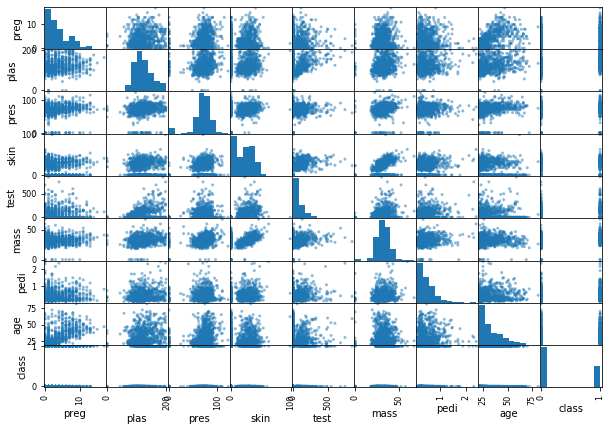

In [196]:
import matplotlib.pyplot as plt 
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(10,7));

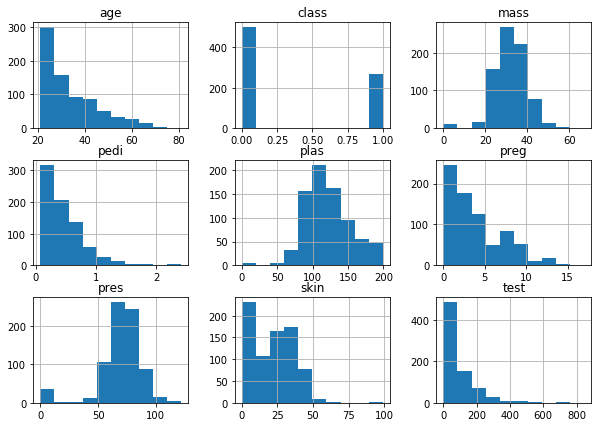

In [197]:
df.hist(figsize=(10,7));

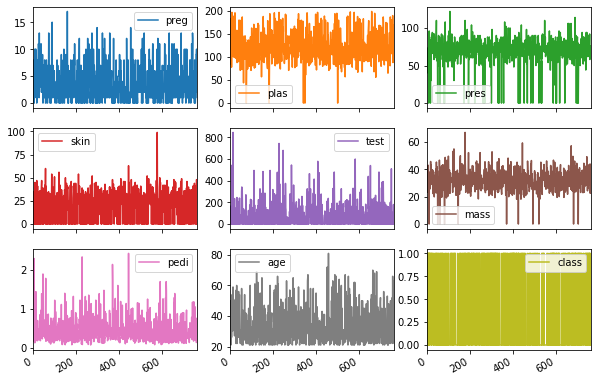

In [198]:
df.plot(kind='line',subplots=True,layout=(3,3),figsize=(10,7));

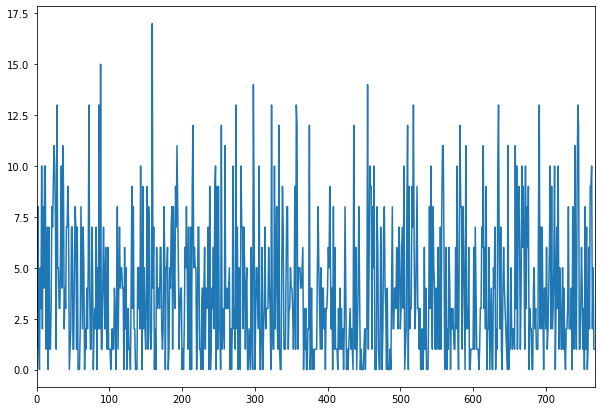

In [69]:
df['preg'].plot(kind='line',figsize=(10,7));

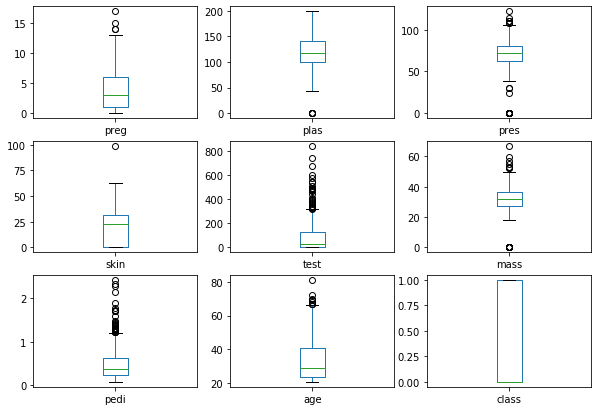

In [70]:
df.plot(kind='box', subplots= True, layout=(3,3),figsize=(10,7));

In [199]:
import seaborn as sns

In [200]:
corr=df.corr()

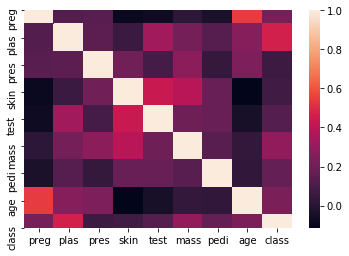

In [201]:
sns.heatmap(corr)

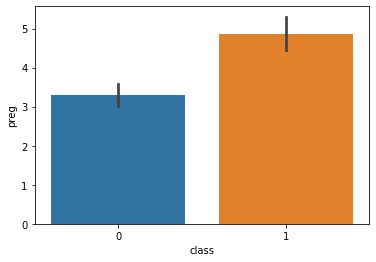

In [203]:
sns.barplot('class','preg',data=df)

In [75]:
df[df['class']==0]['preg'].mean()

3.298

In [204]:
df[df['class']==1]['preg'].mean()

4.865671641791045

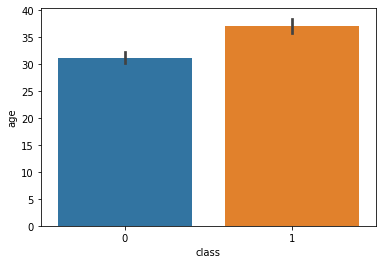

In [205]:
sns.barplot('class','age',data=df)

In [206]:
df[df['class']==0]['age'].mean()

31.19

In [207]:
df[df['class']==1]['age'].mean()

37.06716417910448

# Data Transformation and scaling for Machine Learning

## Techinque for rescaling and transformation

#### Rescale Data
#### Standardize Data
#### Normalize Data
#### Bianrize Data

### Scikit

In [208]:
filename= 'pima-indians-diabetes.data.csv'

In [209]:
names=['preg','plas','pres','skin','test','mass','pedi','age','class']

In [210]:
import pandas as pd

In [211]:
df=df= pd.read_csv("C:\\Users\\HP\\Desktop\\Bup\\CSV_files\\pima-indians-diabetes.csv",names=names)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [216]:
data= df.values

In [217]:
data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [218]:
X=data[:,0:8]
Y=data[:,8]

In [219]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [220]:
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

## Scaling Data and Standardize Data

In [96]:
from sklearn.preprocessing import MinMaxScaler
mmScaler= MinMaxScaler(feature_range=(0,1))
rescaleX= mmScaler.fit_transform(X)

In [97]:
rescaleX

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

## Standardize Data

In [98]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [99]:
X[:,0].mean()

3.8450520833333335

In [103]:
X[:,0].std()

3.3673836124089958

In [104]:
from sklearn.preprocessing import StandardScaler
sScaler= StandardScaler()
rescaleX= sScaler.fit_transform(X)

In [105]:
rescaleX

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [106]:
rescaleX[:,0].mean()

-6.47630097698008e-17

In [107]:
rescaleX[:,0].std()

1.0

## Normalize Data and Binarize Data

In [108]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [109]:
from sklearn.preprocessing import Normalizer
norm= Normalizer()
norm.fit_transform(X)

array([[0.03355237, 0.82762513, 0.40262844, ..., 0.18789327, 0.00350622,
        0.27960308],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.22407851, 0.00295683,
        0.26114412],
       [0.04039768, 0.92409698, 0.32318146, ..., 0.11765825, 0.00339341,
        0.16159073],
       ...,
       [0.02691539, 0.65135243, 0.38758161, ..., 0.14103664, 0.00131885,
        0.16149234],
       [0.00665306, 0.83828547, 0.39918356, ..., 0.20025708, 0.00232192,
        0.31269379],
       [0.00791454, 0.73605211, 0.55401772, ..., 0.24060198, 0.00249308,
        0.18203439]])

## Binarize Data

In [112]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [113]:
from sklearn.preprocessing import Binarizer
bin= Binarizer(threshold=5)
bin.fit_transform(X)

array([[1., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       ...,
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.]])

# Feature Selection

### Technique of Feature Selection

In [133]:
import pandas as pd
import numpy as np
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
df= pd.read_csv("C:\\Users\\HP\\Desktop\\Bup\\CSV_files\\pima-indians-diabetes.csv",names=names)
array= df.values
X=array[:,0:8]
Y=array[:,8]

In [134]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [135]:
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

### Univariate Feature Selection

In [136]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [137]:
X.shape

(768, 8)

In [138]:
selectkbest= SelectKBest(score_func= f_regression, k=4)

In [139]:
sfit= selectkbest.fit(X,Y)

In [143]:
sfit.scores_

array([ 39.67022739, 213.16175218,   3.2569504 ,   4.30438091,
        13.28110753,  71.7720721 ,  23.8713002 ,  46.14061124])

In [144]:
names

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [145]:
sfit.transform(X)

array([[  6. , 148. ,  33.6,  50. ],
       [  1. ,  85. ,  26.6,  31. ],
       [  8. , 183. ,  23.3,  32. ],
       ...,
       [  5. , 121. ,  26.2,  30. ],
       [  1. , 126. ,  30.1,  47. ],
       [  1. ,  93. ,  30.4,  23. ]])

In [146]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

## Recursive or Repititive Feature Elimination 

In [147]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [148]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [149]:
rfe= RFE(LogisticRegression(),n_features_to_select=4)

In [150]:
rfe.fit(X,Y)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=4, step=1, verbose=0)

In [151]:
rfe.ranking_

array([1, 1, 2, 4, 5, 1, 1, 3])

In [154]:
rfe.support_

array([ True,  True, False, False, False,  True,  True, False])

In [155]:
names

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [159]:
rfe.transform(X)

array([[  6.   , 148.   ,  33.6  ,   0.627],
       [  1.   ,  85.   ,  26.6  ,   0.351],
       [  8.   , 183.   ,  23.3  ,   0.672],
       ...,
       [  5.   , 121.   ,  26.2  ,   0.245],
       [  1.   , 126.   ,  30.1  ,   0.349],
       [  1.   ,  93.   ,  30.4  ,   0.315]])

In [161]:
X[0:2,:]

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ]])

# Principal Component Analysis

In [162]:
from sklearn.decomposition import PCA

In [163]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [164]:
pca= PCA(n_components=3)

In [168]:
pca.fit(X,Y)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [169]:
pca.components_

array([[-2.02176587e-03,  9.78115765e-02,  1.60930503e-02,
         6.07566861e-02,  9.93110844e-01,  1.40108085e-02,
         5.37167919e-04, -3.56474430e-03],
       [-2.26488861e-02, -9.72210040e-01, -1.41909330e-01,
         5.78614699e-02,  9.46266913e-02, -4.69729766e-02,
        -8.16804621e-04, -1.40168181e-01],
       [-2.24649003e-02,  1.43428710e-01, -9.22467192e-01,
        -3.07013055e-01,  2.09773019e-02, -1.32444542e-01,
        -6.39983017e-04, -1.25454310e-01]])

In [170]:
pca.explained_variance_

array([13456.57298102,   932.76013231,   390.57783115])

In [171]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [172]:
pca.transform(X)

array([[-75.71465491, -35.95078264,  -7.26078895],
       [-82.3582676 ,  28.90821322,  -5.49667139],
       [-74.63064344, -67.90649647,  19.46180812],
       ...,
       [ 32.11319827,   3.3766648 ,  -1.58786446],
       [-80.21449431, -14.18601977,  12.3512639 ],
       [-81.30814972,  21.62149606,  -8.15276833]])

# Variance threshold- Feature selection

In [180]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [181]:
from sklearn.feature_selection import VarianceThreshold

In [182]:
vt=VarianceThreshold(threshold=200)

In [183]:
vtFit= vt.fit(X,Y)

In [184]:
vtFit.variances_

array([1.13392724e+01, 1.02091726e+03, 3.74159449e+02, 2.54141900e+02,
       1.32638869e+04, 6.20790465e+01, 1.09635697e-01, 1.38122964e+02])

In [185]:
names

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## Tree based Method for Feature Selection

In [186]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [189]:
rf= RandomForestClassifier()
ex= ExtraTreesClassifier()

In [190]:
rfFit= rf.fit(X,Y)
exFit= ex.fit(X,Y)

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [192]:
rfFit.estimators_ # not necessary here#

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1970305131, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1614458197, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                 

In [193]:
rfFit.feature_importances_

array([0.08662799, 0.25383776, 0.0911629 , 0.07620229, 0.06558076,
       0.17549718, 0.11201037, 0.13908075])

In [194]:
exFit.feature_importances_

array([0.11806136, 0.24499035, 0.10412988, 0.0848659 , 0.07220994,
       0.12315062, 0.12295888, 0.12963307])

In [195]:
names

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']